In [4]:
! pip install pandas_datareader
from pandas_datareader import data

In [5]:
import pandas_profiling

In [7]:
IBM=data.DataReader('IBM',start='2004',end='2019',
                   data_source='yahoo')
IBM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-31,92.849998,92.160004,92.660004,92.680000,4726900.0,61.915489
2004-01-02,93.050003,91.199997,92.860001,91.550003,5327800.0,61.160595
2004-01-05,93.089996,92.000000,92.000000,93.050003,5276300.0,62.162693
2004-01-06,93.190002,92.139999,92.199997,93.059998,4380000.0,62.169365
2004-01-07,93.379997,92.470001,93.139999,92.779999,4927600.0,61.982319


In [8]:
IBM.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,111.000000,107.500000,109.900002,107.570000,3821400.0,101.585991
2018-12-26,111.389999,105.940002,108.000000,111.389999,6645800.0,105.193497
2018-12-27,113.779999,109.470001,109.989998,113.779999,6045600.0,107.450539
2018-12-28,114.800003,112.500000,114.220001,113.029999,5117500.0,106.742264
2018-12-31,114.349998,112.419998,113.330002,113.669998,4982800.0,107.346657


In [9]:
IBM.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3776.000000,3776.000000,3776.000000,3776.000000,3.776000e+03,3776.000000
mean,138.723091,136.634595,137.625252,137.698999,5.735134e+06,106.458762
std,39.346394,39.065203,39.212126,39.209461,3.098423e+06,35.593995
min,73.690002,69.500000,72.529999,71.739998,1.027500e+06,48.570713
25%,99.965000,98.500000,99.142502,99.365002,3.726300e+06,68.739008
50%,142.860001,140.764999,141.899994,141.860001,4.936300e+06,115.123821
75%,169.389999,166.835003,167.982498,168.264996,6.814525e+06,138.547127
max,215.899994,214.300003,215.380005,215.800003,3.077070e+07,165.514679


In [11]:
pandas_profiling.ProfileReport(IBM)

In [12]:
ibm=IBM['Close']
ibm

Date
2003-12-31     92.680000
2004-01-02     91.550003
2004-01-05     93.050003
2004-01-06     93.059998
2004-01-07     92.779999
                 ...    
2018-12-24    107.570000
2018-12-26    111.389999
2018-12-27    113.779999
2018-12-28    113.029999
2018-12-31    113.669998
Name: Close, Length: 3776, dtype: float64

In [13]:
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns

In [16]:
%matplotlib inline
sns.set()

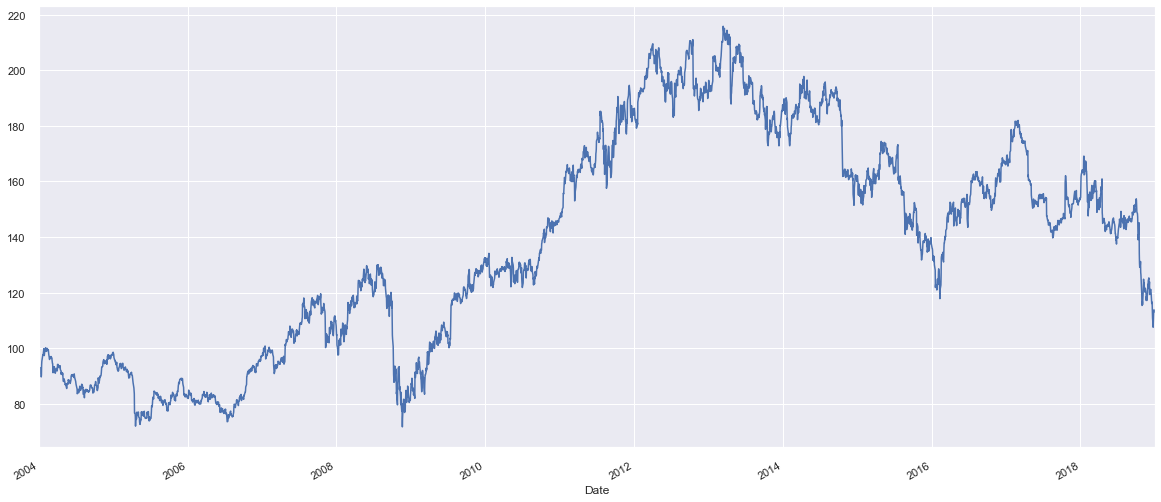

In [17]:
plt.figure(figsize=(20,9))
ibm.plot()

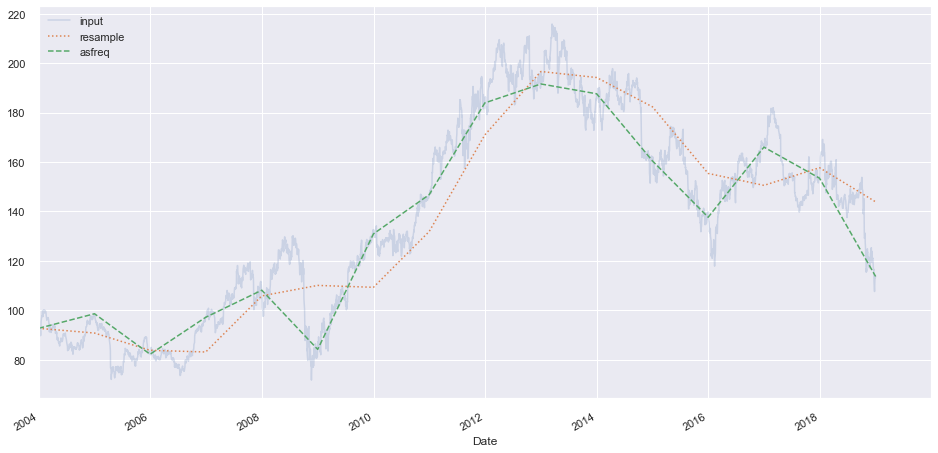

In [27]:
fig = plt.figure(figsize=(16,8))
ibm.plot(alpha=0.2,style='-')
ibm.resample('BA').mean().plot(style=':')  # here BA is a business year
ibm.asfreq('BA').plot(style='--')
plt.legend(['input','resample','asfreq'],
           loc='upper left');

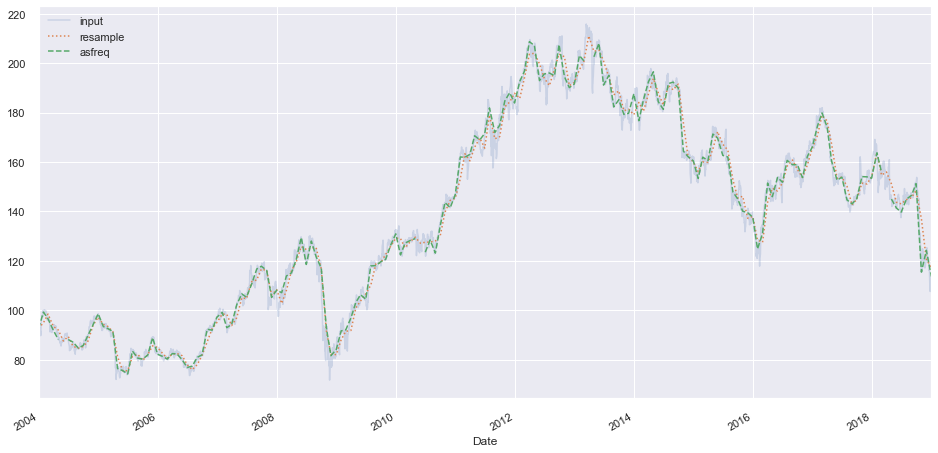

In [28]:
fig = plt.figure(figsize=(16,8))
ibm.plot(alpha=0.2,style='-')
ibm.resample('BM').mean().plot(style=':')  # here BA is a business month
ibm.asfreq('BM').plot(style='--')
plt.legend(['input','resample','asfreq'],
           loc='upper left');

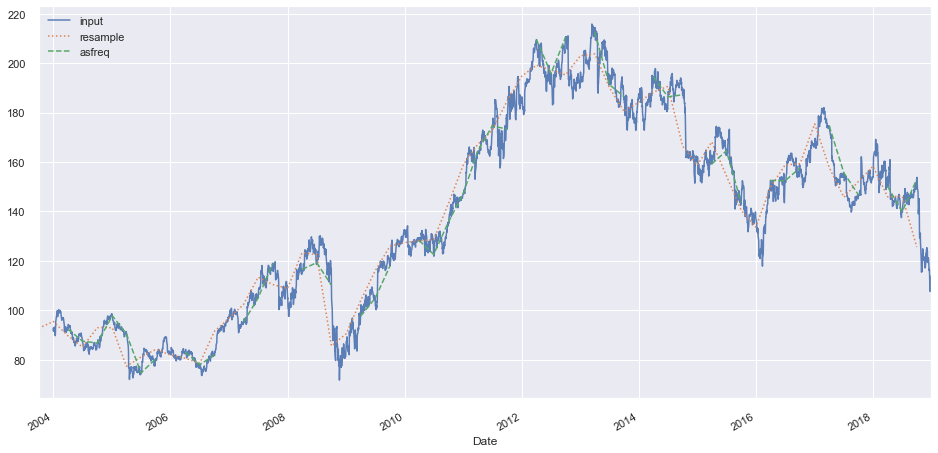

In [37]:
fig = plt.figure(figsize=(16,8))
ibm.plot(alpha=0.9,style='-')
ibm.resample('BQS').mean().plot(style=':',alpha=1)  # here BA is a business quarter year end
ibm.asfreq('BQS').plot(style='--')
plt.legend(['input','resample','asfreq'],
           loc='upper left');

<Figure size 1152x648 with 0 Axes>

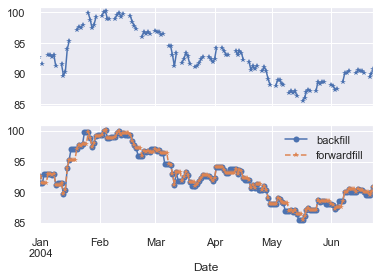

In [42]:
fig =plt.figure(figsize=(16,9))
fig,ax= plt.subplots(2, sharex=True) # here 2 means plot is divided into two and sharex=true means share 
                                    #the values of x[1] to x[0]
# missing data
data.asfreq('D').plot(ax=ax[0],marker='*')

data.asfreq('D',method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D',method='ffill').plot(ax=ax[1],style='--*')
ax[1].legend(['backfill','forwardfill'])

<Figure size 1152x648 with 0 Axes>

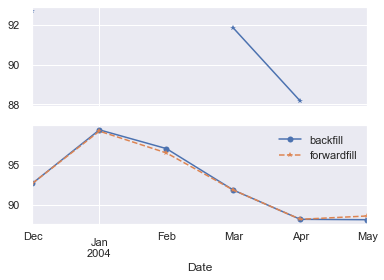

In [40]:
fig =plt.figure(figsize=(16,9))
fig,ax= plt.subplots(2, sharex=True) # here 2 means plot is divided into two and sharex=true means share 
                                    #the values of x[1] to x[0]
data=ibm.iloc[:120]
# missing data
data.asfreq('M').plot(ax=ax[0],marker='*')

data.asfreq('M',method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('m',method='ffill').plot(ax=ax[1],style='--*')
ax[1].legend(['backfill','forwardfill'])

In [43]:
ibm.iloc[:120]

Date
2003-12-31    92.680000
2004-01-02    91.550003
2004-01-05    93.050003
2004-01-06    93.059998
2004-01-07    92.779999
                ...    
2004-06-17    90.440002
2004-06-18    90.059998
2004-06-21    89.489998
2004-06-22    90.019997
2004-06-23    90.790001
Name: Close, Length: 120, dtype: float64

# time shifts

# shifts  is used to shift the date not valuess
# tshifts is used to shift the index 

In [48]:
import pandas as pd

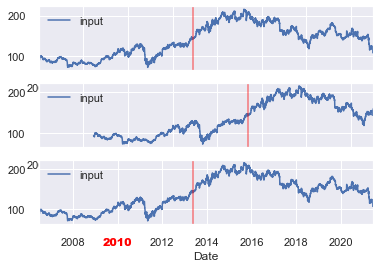

In [52]:
fig,ax = plt.subplots(3,sharey=True)
ibm=ibm.asfreq('D',method='pad')
ibm.plot(ax=ax[0])
ibm.shift(900).plot(ax=ax[1])
ibm.tshift(900).plot(ax=ax[2])
# legends and annotations
local_max = pd.to_datetime('2010-12-05')
offset = pd.Timedelta(900,'D')

ax[0].legend(['input'],loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy',color='red')
ax[0].axvline(local_max,alpha=0.5,color='red')

ax[1].legend(['input'],loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy',color='red')
ax[1].axvline(local_max + offset,alpha=0.5,color='red')

ax[2].legend(['input'],loc=2)
ax[2].get_xticklabels()[2].set(weight='heavy',color='red')
ax[2].axvline(local_max + offset,alpha=0.5,color='red')
